# <div style="text-align: center"> Final Project

## <div style="text-align: center">Binary Image Classifier On Dogs and Cats Dataset

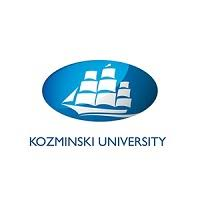

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array, plot_model
from imports_for_ML import *

2023-02-12 21:30:52.345843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os

img_dir = r'/Users/lukpares/Documents/master_degree/Basic_Python/train'
images = os.listdir(img_dir)
full_images = sorted([os.path.join(img_dir, img) for img in images])

## I have changed 10,000 to 25,000 to increase the learning sample

In [3]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=25000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [4]:
print(X.shape)
print(y.shape)

(25000, 50, 50, 3)
(25000,)


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=23)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23)

print("X:")
print("train", X_train.shape)
print("test ", X_test.shape)
print("valid", X_valid.shape)


print("y:")
print("train", y_train.shape)
print("test ", y_test.shape)
print("valid", y_valid.shape)


X:
train (20000, 50, 50, 3)
test  (2500, 50, 50, 3)
valid (2500, 50, 50, 3)
y:
train (20000,)
test  (2500,)
valid (2500,)


In [6]:
del X, y, X_temp, y_temp # to free the memory

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

## 3. Creating neural network model

- changed number of Dense neurons to 128

In [8]:
model = Sequential([

# we create two convolution layers, then max pooling
    Conv2D(16, (3,3), activation = 'relu'),
    Conv2D(16, (3,3), activation = 'relu'),
    MaxPooling2D((3,3)),
# we create next two convolution layers, then max pooling
    Conv2D(32, (3,3), activation = 'relu'),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
# finally, we flatten all the filters to one vector and then add 64 ordinary neurons
    Flatten(input_shape = (5,5,128)),
    Dense(128, activation = 'relu'),

# and the output neuron that says dog (1) or cat (0)
    Dense(1, activation = 'sigmoid')

])

2023-02-12 21:32:44.859572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## I increased the number of epochs from 10 to 30 because accuracy was still getting better

In [10]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
625/625 [==============================] - 51s 79ms/step - loss: 0.7529 - accuracy: 0.5750 - val_loss: 0.6426 - val_accuracy: 0.6300
Epoch 2/30
625/625 [==============================] - 50s 79ms/step - loss: 0.6046 - accuracy: 0.6712 - val_loss: 0.5903 - val_accuracy: 0.6944
Epoch 3/30
625/625 [==============================] - 50s 80ms/step - loss: 0.5480 - accuracy: 0.7232 - val_loss: 0.5980 - val_accuracy: 0.6756
Epoch 4/30
625/625 [==============================] - 51s 81ms/step - loss: 0.4988 - accuracy: 0.7607 - val_loss: 0.5230 - val_accuracy: 0.7428
Epoch 5/30
625/625 [==============================] - 49s 79ms/step - loss: 0.4613 - accuracy: 0.7867 - val_loss: 0.4603 - val_accuracy: 0.7820
Epoch 6/30
625/625 [==============================] - 49s 78ms/step - loss: 0.4205 - accuracy: 0.8084 - val_loss: 0.4568 - val_accuracy: 0.7904
Epoch 7/30
625/625 [==============================] - 49s 78ms/step - loss: 0.3919 - accuracy: 0.8230 - val_loss: 0.4612 - val_accuracy:

## 4. Visualization of train loss and validation loss

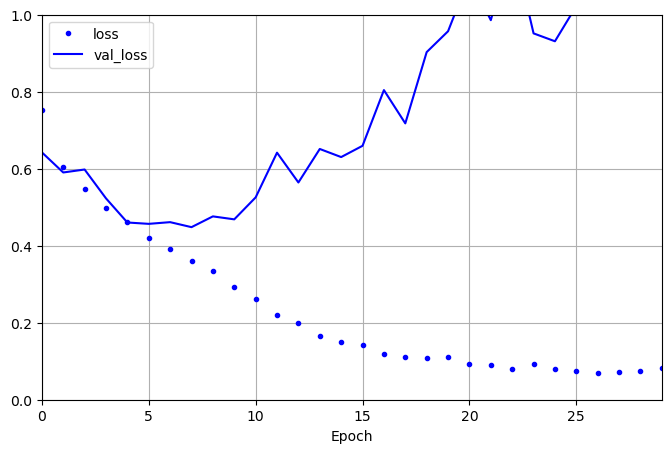

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history)[["loss", "val_loss"]].plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["b.", "b-"])
plt.show()
# source: https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb

## 5.  Test accuracy and loss

In [12]:
test_eval = model.evaluate(X_test, y_test, verbose = 0)
loss = round(test_eval[0], 3)
accuracy = round(test_eval[1], 3)

print("test loss:", loss, "test accuracy:", accuracy)

test loss: 1.419 test accuracy: 0.778


## 6. Visualize false positives and false negatives on a test data

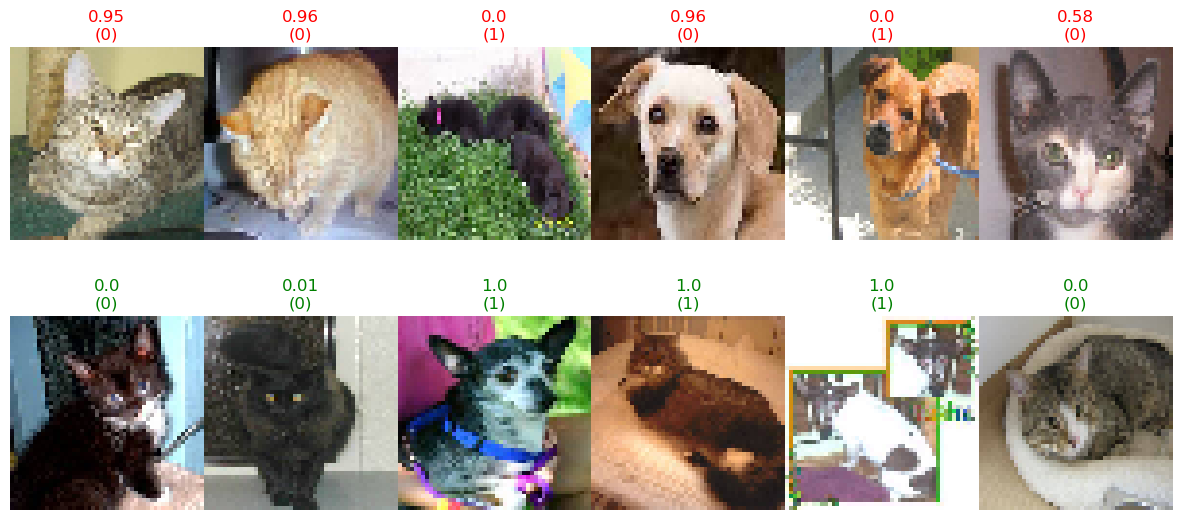

In [13]:
import random
import numpy as np

# visualize 6 correctly and incorrectly labeled images
def visualize_6(model, X_test, y_test):
    y_pred = model.predict(X_test, verbose = 0).reshape(len(y_test))
    y_scores = np.round(y_pred)
    
    correct_filt = (y_test == y_scores)
    incorrect_filt = (y_test != y_scores)
    
    random_correct_indexes = random.sample(range(0, sum(correct_filt)-1),6)
    random_incorrect_indexes = random.sample(range(0, sum(incorrect_filt)-1), 6)
    
    X_correct = X_test[correct_filt].copy()[random_correct_indexes]
    y_correct = y_test[correct_filt].copy()[random_correct_indexes]
    y_correct_pred = y_pred[correct_filt].copy()[random_correct_indexes]

    X_incorrect = X_test[incorrect_filt].copy()[random_incorrect_indexes]
    y_incorrect = y_test[incorrect_filt].copy()[random_incorrect_indexes]
    y_incorrect_pred = y_pred[incorrect_filt].copy()[random_incorrect_indexes]


    # Plot the images
    fig, axs = plt.subplots(2, 6, figsize=(15,7), gridspec_kw={'wspace':0, 'hspace':0})
    for i in range(6):
        col = i % 6
        
        axs[0, col].imshow(X_correct[i].astype('float32') / 255.0)
        axs[0, col].axis('off')
        axs[0, col].set_title(
            str(y_incorrect_pred[i].round(2)) + "\n(" + str(y_incorrect[i].round(2)) + ")",
            color='red'
        )
        
        axs[1, col].imshow(X_incorrect[i].astype('float32') / 255.0)
        axs[1, col].axis('off')
        axs[1, col].set_title(
            str(y_correct_pred[i].round(2)) + "\n(" + str(y_correct[i].round(2))+ ")",
            color='green'
        )
        

    plt.show()
   
    
    
visualize_6(model, X_test, y_test)

    

## 7. Testing on unseen photos

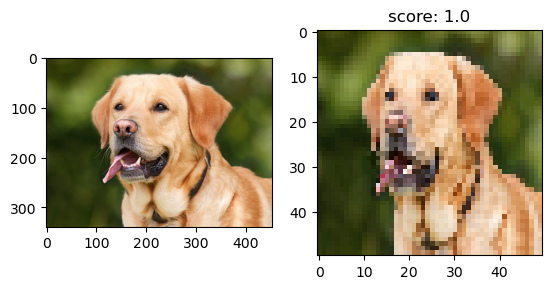

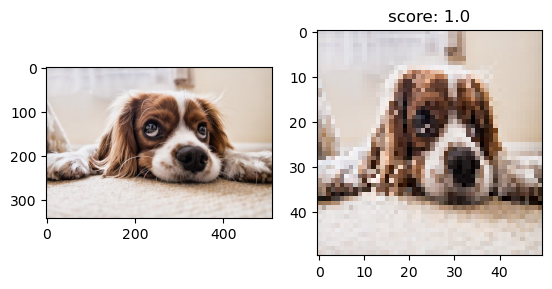

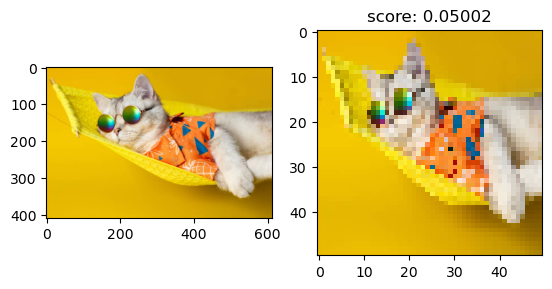

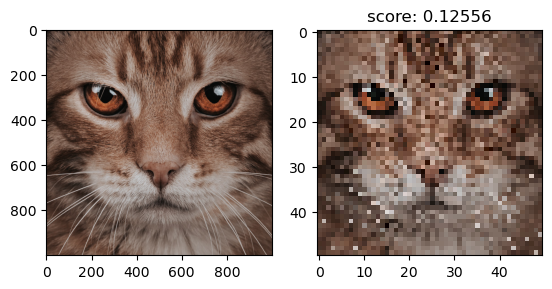

In [14]:
def run_classification_with_visualization(img_path):
    f, axarr = plt.subplots(1,2)
    
    img = load_img(img_path)
    axarr[0].imshow(img)

    img = load_img(img_path, target_size=(50, 50))
    axarr[1].imshow(img)
    
    img_array = img_to_array(img)
    
    probability = model.predict(img_array.reshape((1, 50, 50, 3)), verbose = 0)[0][0]
    axarr[1].set_title(f"score: {str(probability.round(5))}")
    
run_classification_with_visualization('/Users/lukpares/Documents/master_degree/Basic_Python/new.dog.1.jpg')
run_classification_with_visualization('/Users/lukpares/Documents/master_degree/Basic_Python/new.dog.2.jpg')
run_classification_with_visualization('/Users/lukpares/Documents/master_degree/Basic_Python/new.cat.1.jpg')
run_classification_with_visualization('/Users/lukpares/Documents/master_degree/Basic_Python/new.cat.2.jpg')

## 8. Save the model

In [15]:
import keras

In [16]:
model_file = r'/Users/lukpares/Documents/master_degree/Basic_Python/ANCHISA_PRAKOBCHAT_47335_MODEL.h5'

keras.models.save_model(
    model=model,
    filepath=model_file, 
    save_format='h5'
)

In [17]:
# model_file = r'/Users/lukpares/Documents/master_degree/Basic_Python/ANCHISA_PRAKOBCHAT_47335_MODEL.h5'


# model = keras.models.load_model(model_file)